# Explore here

In [2]:
pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secreta = os.environ.get("CLIENT_SECRET")

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secreta)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
artist_id = "0W4t58pS2IXD4R8CTj2zH7"

results = spotify.artist_top_tracks(artist_id)

canciones = []
for track in results['tracks']:
    canciones.append({
        'nombre': track['name'],
        'popularidad': track['popularity'],
        'duracion': track['duration_ms'] / 60000
    })

In [6]:
df = pd.DataFrame(canciones)
print(df.head(10))

                   nombre  popularidad  duracion
0               Break up!           28  4.111200
1             Brave Heart           25  4.077450
2                 SLASH!!           26  3.912250
3          DAN DAN 心魅かれてく           29  3.558333
4              ONE VISION           28  4.585517
5               Beat Hit!           27  4.344683
6   Borutesu Faibu No Uta           17  3.045833
7  Hello Mr. My Yesterday           26  4.474417
8           With the Will           26  4.089817
9        Umapyoi Densetsu           24  4.417633


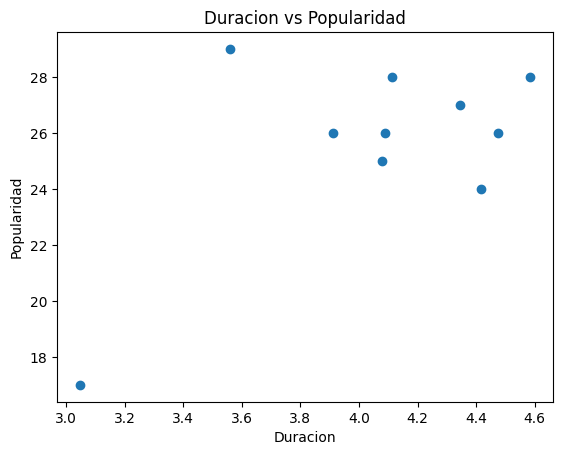

In [8]:
plt.scatter(df['duracion'], df['popularidad'])
plt.xlabel('Duracion')
plt.ylabel('Popularidad')
plt.title('Duracion vs Popularidad')
plt.show()

Como se puede observar, si hay cierta relacion entre la duracion y la popularidad, ya que las canciones que tienen una duracion mayor a 3,6 min tienen una popularidad alta mientras la que tiene 3min aproximadamente tiene menor popularidad